In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2 as cv
from random import randrange
# Reference Image
imagec = cv2.imread('/content/drive/MyDrive/Colab Notebooks/babbon.bmp')# My reference Image
image=np.dot(imagec[...,:3], [0.2989, 0.5870, 0.1140])
row,col= image.shape
plt.title("Original Image Matrix %1.0f" %row + "x %1.0f" %col+" dimensions" )
plt.imshow(image,cmap=plt.get_cmap('gray'))

NameError: ignored

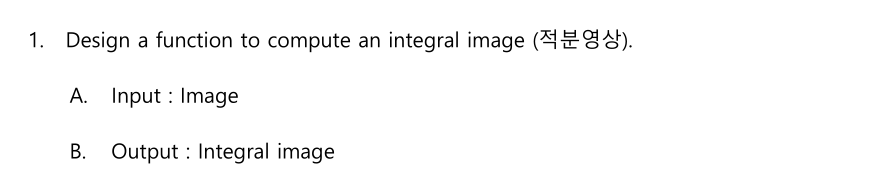

In [ ]:
def integral_image_calculator(image):
  a,b=image.shape
  integral=np.zeros((a,b),dtype='int')
  for j in range(a):
    for i in range(b):
      temp=image[:i,:j]
      integral[i,j]=np.sum(temp)

  return integral


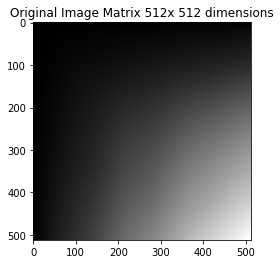

In [ ]:
new_image=integral_image_calculator(image)
cv2.normalize(new_image, new_image, 0, 255, cv2.NORM_MINMAX, -1)
plt.title("Original Image Matrix %1.0f" %row + "x %1.0f" %col+" dimensions" )
plt.imshow(new_image,cmap=plt.get_cmap('gray'))

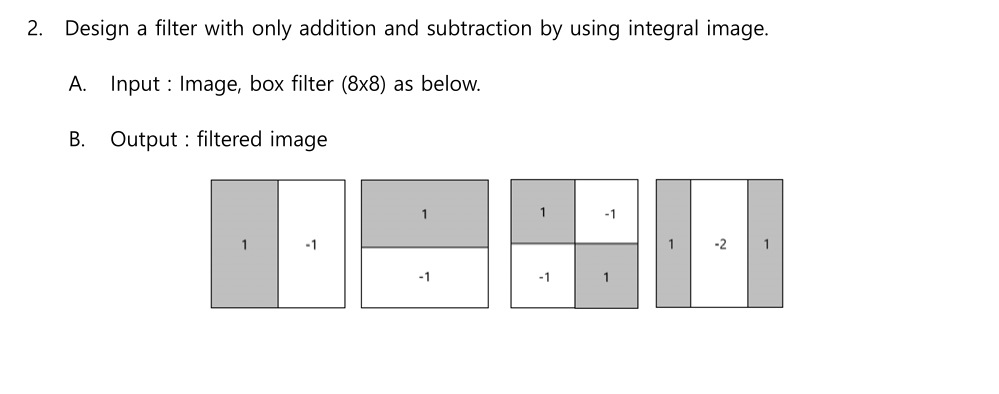

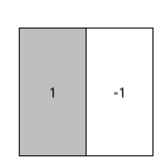

In [ ]:

a,b=new_image.shape
temp=np.zeros((a,b))
for j in range(a-1):
  for i in range(b-1):
    temp[i,j]=new_image[i+1,j]-new_image[i,j]

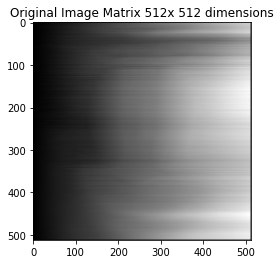

In [ ]:
plt.title("Original Image Matrix %1.0f" %row + "x %1.0f" %col+" dimensions" )
plt.imshow(temp,cmap=plt.get_cmap('gray'))

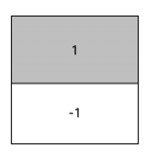

In [ ]:
a,b=new_image.shape
temp=np.zeros((a,b))
for j in range(a-1):
  for i in range(b-1):
    temp[i,j]=new_image[i,j+1]-new_image[i,j]

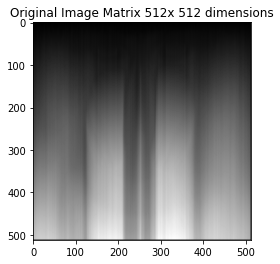

In [ ]:
plt.title("Original Image Matrix %1.0f" %row + "x %1.0f" %col+" dimensions" )
plt.imshow(temp,cmap=plt.get_cmap('gray'))

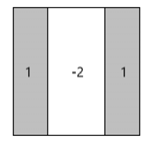

In [ ]:
a,b=new_image.shape
temp=np.zeros((a,b))
for j in range(a-2):
  for i in range(b-2):
    temp[i,j]=new_image[i,j+2]+new_image[i,j]-2*new_image[i,j+1]

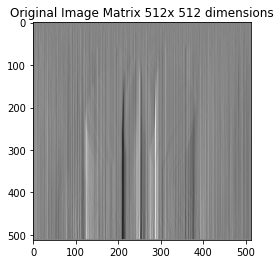

In [ ]:
plt.title("Original Image Matrix %1.0f" %row + "x %1.0f" %col+" dimensions" )
plt.imshow(temp,cmap=plt.get_cmap('gray'))

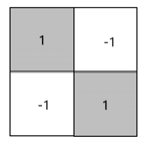

In [ ]:
a,b=new_image.shape
temp=np.zeros((a,b))
for j in range(a-1):
  for i in range(b-1):
    temp[i,j]=new_image[i,j]-new_image[i,j+1]-new_image[i+1,j]+new_image[i+1,j+1]

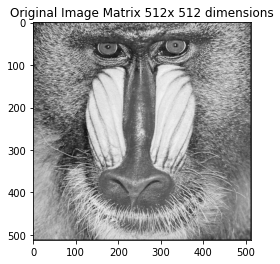

In [ ]:
plt.title("Original Image Matrix %1.0f" %row + "x %1.0f" %col+" dimensions" )
plt.imshow(temp,cmap=plt.get_cmap('gray'))

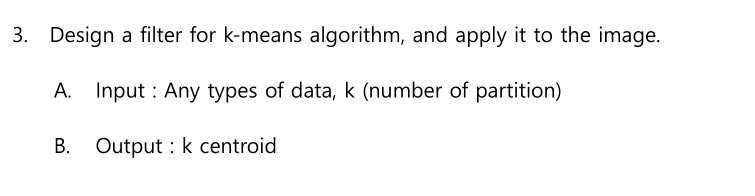

In [ ]:
def kmeaner(image,k,iterations=1):
  image_dup=np.copy(image)
  a,b=image.shape
  label_mat=np.zeros((a,b))
  image_mat_k=np.zeros((a,b,k))
  label_mat_k=np.zeros((a,b,k))
  result=0

  for x in range(k):
    image_mat_k[:,:,x]=image
  

  X=[]
  Y=[]
  I=[]


  for i in range(k):
    x=randrange(b+1)
    y=randrange(a+1)
    X.append(x)
    Y.append(y)
    I.append(image[x,y])
    
  I_temp=I
  for j in range(a):
    for i in range(b):
      D=min(I, key=lambda x:(abs(x-image[i,j])))
      I_temp[:] = [abs(pixel - D) for pixel in I_temp]
      label_mat[i,j]=I_temp.index(min(I_temp))


  if iterations>1:
    for iter in range(1,iterations):
      image_mat_k=np.zeros((a,b,k))
      image_mat_k=np.zeros((a,b,k))
      label_mat_k=np.zeros((a,b,k))
      X=[]
      Y=[]
      I=[]

      for x in range(k):
        image_mat_k[:,:,x]=image
        label_mat_k[:,:,x]=label_mat


      for k_i in range(0,k-1):
        image_mat_k[:,:,k_i] = np.where(label_mat!=k_i, 0, image_mat_k[:,:,k_i])
        label_mat_k[:,:,k_i] = np.where(label_mat!=k_i, 0, label_mat_k[:,:,k_i])
        numerator=np.sum(image_mat_k[:,:,k_i])
        denomenator=np.sum(label_mat_k[:,:,k_i])
        mean=numerator/(denomenator+0.01)
        result = np.where(abs(image_dup-mean) == np.amin(abs(image_dup-mean)))
      
        listOfCordinates = list(zip(result[0], result[1]))
        chips=listOfCordinates[0]
        X.append(chips[0])
        Y.append(chips[1])
        I.append(image[chips[0],chips[1]])

      I_temp=I

      for j in range(a):
        for i in range(b):
          D=min(I, key=lambda x:(abs(x-image[i,j])))
          I_temp[:] = [abs(pixel - D) for pixel in I_temp]
          label_mat[i,j]=I_temp.index(min(I_temp))


  
  k_centroids=zip(X, Y)

  return label_mat, k_centroids

Text(0.5, 1.0, 'Original Image')

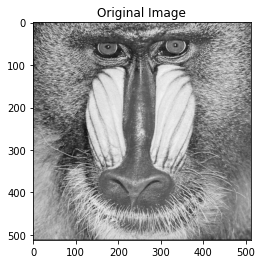

In [ ]:

k=3
iterations=10
Marker, k_centroids=kmeaner(image,k,iterations)

#cv2.normalize(X, X, 0, 255, cv2.NORM_MINMAX, -1)
I = np.dstack([image, image, image])

# im = np.random.randint(0, 255, (16, 16))
# I = np.dstack([im, im, im])
a,b=image.shape
for j in range(a):
  for i in range(b):
    if X[i,j]==0:
      I[i, j, :] = [1, 0, 0]
    elif X[i,j]==1:
      I[i, j, :] = [0, 1, 0]
    elif X[i,j]==2:
      I[i, j, :] = [0, 0, 1]
    else:
      I[i, j, :] = I[i,j,:]


plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.title("Original Image" )

Text(0.5, 1.0, 'Identification of K=3 Clusters')

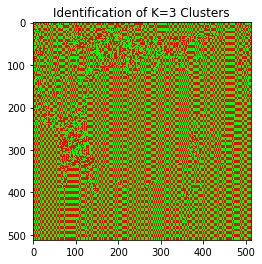

In [ ]:
plt.imshow(I, interpolation='nearest' )
plt.title("Identification of K=%1.0f" %k+" Clusters" )